In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('empreinteCarboneMissions_2022121.tsv', sep='\t')
data = data.rename(columns={'Quantité' : 'N', 'Distance (km)': 'dist'})
data

,ID,Type,Mode de deplacement,N,Statut,Nombre de personne,Motif,Aller / Retour,dist,Emission (kg eCO2),Incertitude (kg eCO2)
0,"1,2,99,515,868,1015,1370,1639",MX,plane,8,NaN,1,NaN,OUI,79500,6591,659
1,"1,91,280,838,871,873,962,968,988,1190,1239,135...",NaN,train,15,NaN,1,NaN,OUI,21405,64,13
2,2,MX,plane,1,NaN,1,NaN,OUI,9511,788,79
3,2,NaN,plane,1,NaN,1,NaN,OUI,875,124,12
4,3,NaN,plane,1,NaN,1,NaN,OUI,1691,239,24
...,...,...,...,...,...,...,...,...,...,...,...
603,230,MX,plane,1,NaN,1,NaN,OUI,2169,222,22
604,231,NaN,car,1,NaN,1,NaN,OUI,291,68,41
605,232,NaN,car,1,NaN,1,NaN,OUI,291,68,41
606,233,NaN,train,1,NaN,1,NaN,OUI,2008,6,1


In [226]:
subdata = data.loc[:, ['N', 'dist']]
subdata = subdata.loc[subdata['dist'] > 0, :]
subdata = subdata.sort_values(by='dist')
dist = subdata['dist'].values.copy()
N = subdata['N'].values.copy()
subdata

,N,dist
273,1,9
325,1,12
492,1,28
544,1,28
351,1,33
...,...,...
147,7,163529
168,9,169850
74,19,359462
19,25,369408


In [227]:
dmin = float(dist.min())
dmin

9.0

In [228]:
dmax = float(dist.max())
dmax

371003.0

In [229]:
dmax = 380000
dmax

380000

In [230]:
step = 2000
bins = np.arange(0, dmax + step, step)
nbins = len(bins)
bins

array([     0,   2000,   4000,   6000,   8000,  10000,  12000,  14000,
        16000,  18000,  20000,  22000,  24000,  26000,  28000,  30000,
        32000,  34000,  36000,  38000,  40000,  42000,  44000,  46000,
        48000,  50000,  52000,  54000,  56000,  58000,  60000,  62000,
        64000,  66000,  68000,  70000,  72000,  74000,  76000,  78000,
        80000,  82000,  84000,  86000,  88000,  90000,  92000,  94000,
        96000,  98000, 100000, 102000, 104000, 106000, 108000, 110000,
       112000, 114000, 116000, 118000, 120000, 122000, 124000, 126000,
       128000, 130000, 132000, 134000, 136000, 138000, 140000, 142000,
       144000, 146000, 148000, 150000, 152000, 154000, 156000, 158000,
       160000, 162000, 164000, 166000, 168000, 170000, 172000, 174000,
       176000, 178000, 180000, 182000, 184000, 186000, 188000, 190000,
       192000, 194000, 196000, 198000, 200000, 202000, 204000, 206000,
       208000, 210000, 212000, 214000, 216000, 218000, 220000, 222000,
      

In [231]:
dl = np.diff(bins)[0]

In [232]:
index = np.digitize(dist, bins, right=True)

In [233]:
outputs = np.zeros((len(bins) - 1), dtype=float)
for i in np.unique(index):
    iok = np.nonzero(index == i)[0]
    outputs[i - 1] = N[iok].sum()

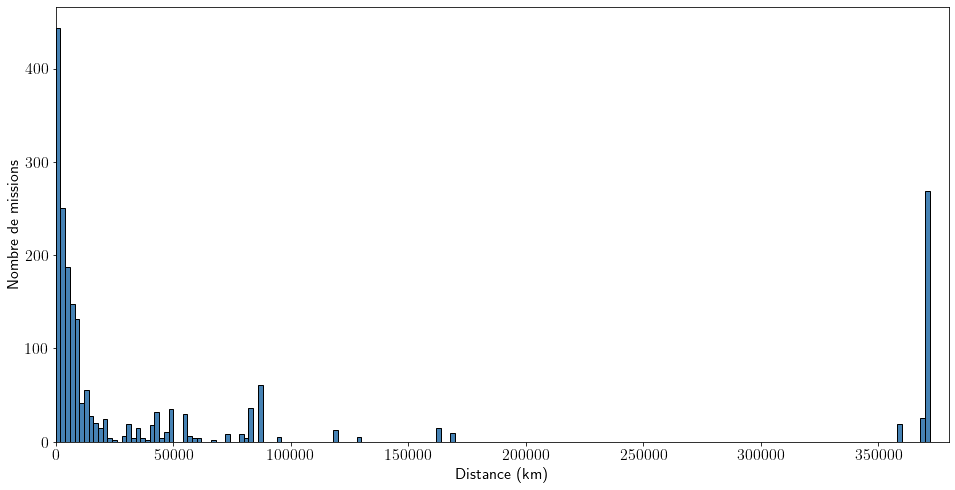

In [237]:
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8), facecolor='white')
plt.bar(bins[slice(0, nbins - 1)], outputs, width=dl, align='edge', color='steelblue', edgecolor='k')
plt.xlabel('Distance (km)')
plt.ylabel('Nombre de missions')
plt.xlim(0, dmax)
plt.savefig('number_missions.png', bbox_inches='tight')